In [ ]:
# This handy piece of code changes Jupyter Notebooks margins to fit your screen.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Be sure you've installed the praw and tqdm libraries. If you haven't you can run the line below.  Node.js in required to install the jupyter widgets in a few cells.  These two cells can take a while to run and won't show progress; you can also run the commands in the command prompt (without the !) to see the progress as it installs.

If conda is taking a long time, you might try the mamba installer: https://github.com/TheSnakePit/mamba
`conda install -c conda-forge mamba -y`
Then installing packages with mamba should be done from the command line (console or terminal).

In [ ]:
!conda install tqdm praw nodejs -y

Install the jupyter widget to enable tqdm to work with jupyter lab:

In [1]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

'jupyter' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
pip install tqdm

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


# Scrape Reddit Comments for a Sentiment Analysis - Assignment
### Go through the notebook and complete the code where prompted
##### This assignment was adapted from a number of sources including: http://www.storybench.org/how-to-scrape-reddit-with-python/ and https://towardsdatascience.com/scraping-reddit-data-1c0af3040768

In [13]:
# Import all the necessary libraries
import praw # Import the Praw library: https://praw.readthedocs.io/en/latest/code_overview/reddit_instance.html
import pandas as pd # Import Pandas library: https://pandas.pydata.org/
import datetime as dt # Import datetime library
import matplotlib.pyplot as plt # Import Matplot lib for plotting
from tqdm import tqdm  # progress bar used in loops

import credentials as cred  # make sure to enter your API credentials in the credentials.py file

# Prompt
### In the cell below, enter your client ID, client secret, user agent, username, and password in the appropitate place withing the quotation marks

In [20]:
# Praw (Python Reddit API Wrapper) is used to communicate with Reddit
reddit = praw.Reddit(client_id='oKMaSo5YJohQ0g',
                     client_secret='W11Ajo-lALQLw8KRfOThvkWYciYvjg',
                     user_agent='Veeral Patel')

# Prompt
## In the cell below, enter a subreddit you which to compare the sentiment of the post comments, decide how far back to pull posts, and how many posts to pull comments from.
## We will be comparing two subreddits, so think of a subject where a comparison might be interesting (e.g. if there are two sides to an issue which may show up in the sentiment analysis as positive and negative scores).

In [21]:
number_of_posts = 200
time_period = 'all'  # use posts from all time

# .top() can use the time_period argument
# subreddit = reddit.subreddit('').top(time_filter=time_period, limit=number_of_posts)

subreddit = reddit.subreddit('travel').hot(limit=number_of_posts)

# Create an empty list to store the data
subreddit_comments = []

# go through each post in our subreddit and put the comment body and id in our dictionary
# the value for 'total' here needs to match 'limit' in reddit.subreddit().top()
for post in tqdm(subreddit, total=number_of_posts):
    submission = reddit.submission(id=post)
    submission.comments.replace_more(limit=0)  # This line of code expands the comments if “load more comments” and “continue this thread” links are encountered
    for top_level_comment in submission.comments: 
        subreddit_comments.append(top_level_comment.body)  # add the comment to our list of comments




  0%|                                                                                          | 0/200 [00:00<?, ?it/s]Exception ignored in: <function tqdm.__del__ at 0x000001E2E60E04C0>
Traceback (most recent call last):
  File "C:\Users\vpatel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\std.py", line 1145, in __del__
    self.close()
  File "C:\Users\vpatel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\notebook.py", line 275, in close
    self.disp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'disp'



  0%|▍                                                                                 | 1/200 [00:06<21:25,  6.46s/it]


  1%|▊                                                                                 | 2/200 [00:07<10:59,  3.33s/it]


  2%|█▏                                         

 56%|████████████████████████████████████████████▍                                   | 111/200 [00:53<00:47,  1.89it/s]


 56%|████████████████████████████████████████████▊                                   | 112/200 [00:54<00:40,  2.16it/s]


 56%|█████████████████████████████████████████████▏                                  | 113/200 [00:54<00:34,  2.49it/s]


 57%|█████████████████████████████████████████████▌                                  | 114/200 [00:54<00:31,  2.75it/s]


 57%|██████████████████████████████████████████████                                  | 115/200 [00:55<00:29,  2.84it/s]


 58%|██████████████████████████████████████████████▍                                 | 116/200 [00:55<00:28,  2.95it/s]


 58%|██████████████████████████████████████████████▊                                 | 117/200 [00:55<00:26,  3.11it/s]


 59%|███████████████████████████████████████████████▏                                | 118/200 [00:55<00:24,  3.35it/s]


 60%|███████████████████

In [22]:
# View the comments.
subreddit_comments

['With Biden saying the US will have enough vaccines for every adult by the end of the May, how open do you think international travel for Americans will be this summer?',
 'Short version: I am very very much hoping to travel from the US to Europe this summer, likely for \\~6 weeks in the June/July/August range. Location flexible, thinking likely Iceland and perhaps Scandinavia. Everything with COVID is looking up but still uncertain right now. How should I be going about planning/booking this?\n\nDetail: This would be with my girlfriend, both US-only citizens, both healthy 26-yos. Obviously, times are tough and unpredictable, but unfortunately my timing is not super flexible (it is within that window but can\'t be later). I am beginning graduate school in the fall and for years have been looking at this summer as a uniquely excellent opportunity to do a big big trip. I have been lucky enough to travel a lot through my young life (40+ countries), but with corporate crunches on vacation

In [23]:
# Store comments in a DataFrame using a dictionary as our input
# This sets the column name as the key of the dictionary, and the list of values as the values in the DataFrame
subreddit_comments_df = pd.DataFrame(data={'comment': subreddit_comments})
subreddit_comments_df

,comment
0,With Biden saying the US will have enough vacc...
1,Short version: I am very very much hoping to t...
2,I am now fully vaccinated; I am an American li...
3,Sounds like Greece will be opening up to trave...
4,What's the timeline for Aus/NZ travel reopenin...
...,...
2460,What struck me when I visited Angkor was how m...
2461,"If you go, get a private tour. They show you ..."
2462,Apocolipse now?
2463,New COD season


In [24]:
# This is an example of how we split up the comments into individual words.
# This technique will be used again to get the scores of each individual word.
for comment in subreddit_comments_df['comment']:  # loop over each word
        comment_words = comment.split()  # split comments into individual words
        for word in comment_words:  # loop over idndividual words in each comment
            word = word.strip('?:!.,;"!@()#-')  # remove extraneous characters
            word = word.replace("\n", "")  # remove end of line
            print(word)
        
        break  # end the loop after one comment

With
Biden
saying
the
US
will
have
enough
vaccines
for
every
adult
by
the
end
of
the
May
how
open
do
you
think
international
travel
for
Americans
will
be
this
summer


### Now we will use the sentiment file called AFINN-en-165.txt.  This file contains a sentiment score for 3382 words.  More information can be found here: https://github.com/fnielsen/afinn With the sentiment file we will assign scores to words within the top comments that are found in the AFINN file

In [25]:
# We load the AFINN sentiment table into a Python dictionary

sentimentfile = open("AFINN-en-165.txt", "r")  # open sentiment file
scores = {}  # an empty dictionary
for line in sentimentfile:  # loop over each word / sentiment score
    word, score = line.split("\t")  # file is tab-delimited
    scores[word] = int(score)  # convert the scores to intergers
    
sentimentfile.close()

In [26]:
# print out the first 10 entries of the dictionary
counter = 0
for key, value in scores.items():
    print(key, ':', value)
    counter += 1
    if counter >= 10:
        break

abandon : -2
abandoned : -2
abandons : -2
abducted : -2
abduction : -2
abductions : -2
abhor : -3
abhorred : -3
abhorrent : -3
abhors : -3


In [27]:
# we create a dictionary for storing overall counts of sentiment values
sentiments = {"-5": 0, "-4": 0, "-3": 0, "-2": 0, "-1": 0, "0": 0, "1": 0, "2": 0, "3": 0, "4": 0, "5": 0}

for word in subreddit_comments_df['comment']:  # loop over each word
        comment_words = word.split()  # split comments into individual words
        for word in comment_words:  # loop over individual words in each comment
            word = word.strip('?:!.,;"!@()#-')  # remove extraneous characters
            word = word.replace("\n", "")  # remove end of line
            if word in scores.keys():  # check if word is in sentiment dictionary
                score = scores[word]  # check if word is in sentiment dictionary
                sentiments[str(score)] += 1  # add one to the sentiment score

In [28]:
# Print the scores
for sentiment_value in range(-5, 6):
    # this uses string formatting, more on this here: https://realpython.com/python-f-strings/
    print(f"{sentiment_value} sentiment:", sentiments[str(sentiment_value)])
    
# this would be equivalent, but obviously much less compact and elegant
# print("-5 sentiments ", sentiments["-5"])
# print("-4 sentiments ", sentiments["-4"])
# print("-3 sentiments ", sentiments["-3"])
# print("-2 sentiments ", sentiments["-2"])
# print("-1 sentiments ", sentiments["-1"])
# print(" 0 sentiments ", sentiments["0"])
# print(" 1 sentiments ", sentiments["1"])
# print(" 2 sentiments ", sentiments["2"])
# print(" 3 sentiments ", sentiments["3"])
# print(" 4 sentiments ", sentiments["4"])
# print(" 5 sentiments ", sentiments["5"])

-5 sentiment: 4
-4 sentiment: 46
-3 sentiment: 229
-2 sentiment: 659
-1 sentiment: 509
0 sentiment: 0
1 sentiment: 855
2 sentiment: 1463
3 sentiment: 971
4 sentiment: 230
5 sentiment: 11


In [29]:
# Now let us put the sentiment scores into a dataframe.
comment_sentiment_df = pd.DataFrame(data={'Sentiment_Value': list(sentiments.keys()), 'Counts': list(sentiments.values())})
# the 'value' column is a string; convert to integer (numeric type)
comment_sentiment_df['Sentiment_Value'] = comment_sentiment_df['Sentiment_Value'].astype('int')

# We normalize the counts so we will be able to compare between two subreddits on the same plot easily
comment_sentiment_df['Normalized_Counts'] = comment_sentiment_df['Counts'] / comment_sentiment_df['Counts'].sum()  # Normalize the Count
comment_sentiment_df

,Sentiment_Value,Counts,Normalized_Counts
0,-5,4,0.000804
1,-4,46,0.009243
2,-3,229,0.046012
3,-2,659,0.132409
4,-1,509,0.102270
5,0,0,0.000000
6,1,855,0.171790
7,2,1463,0.293952
8,3,971,0.195097
9,4,230,0.046213


# Prompt
## We will plot the data so it is easier to visualize.  
## In each of the three cells below, plot the Count, Normalized Count, and Normalized Score vs Sentiment Value.  In each plot add the appropriate x-label, y-label, plot title, and color

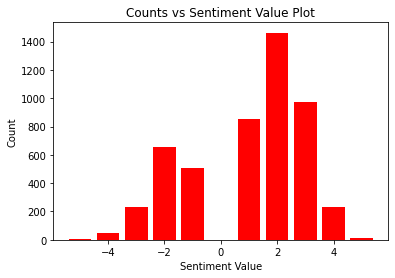

In [31]:
# Count vs Sentiment Value Plot
plt.bar(comment_sentiment_df['Sentiment_Value'], comment_sentiment_df['Counts'], color='red')  # add the y-values and color
plt.xlabel('Sentiment Value')  # add x-label
plt.ylabel('Count')  # add y-label
plt.title('Counts vs Sentiment Value Plot')  # add title
plt.show()

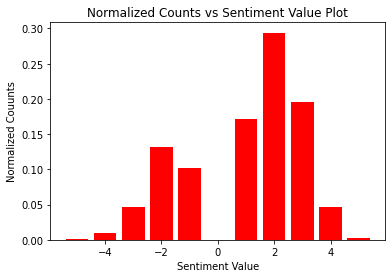

In [32]:
# Normalized Counts vs Sentiment Value Plot
plt.bar(comment_sentiment_df['Sentiment_Value'], comment_sentiment_df['Normalized_Counts'], color='red')  # add the y-values and color
plt.xlabel('Sentiment Value')  # add x-label
plt.ylabel('Normalized Couunts')  # add y-label
plt.title('Normalized Counts vs Sentiment Value Plot')  # add title
plt.show()

# Prompt
### In the cell below, enter a subreddit you which to compare the sentiment of the post comments, decide how far back to pull posts, and how many posts to pull comments from.

Pick a subreddit that can be compared with your first subreddit in terms of sentiment. You may want to go back up to the first subreddit section and change some parameters.  For example, do you want to find top posts, or hot posts? From what time period? How many posts?  If you change these settings above (the `number_of_posts` and `time_period` variables) you should re-run the notebook from the beginning.

The following code is the same as we did for our first subreddit, just condensed into one code cell.

In [33]:
number_of_posts = 100
time_period = 'all'  # use posts from all time

subreddit_2 = reddit.subreddit('technology').hot(limit=number_of_posts)


# Create an empty list to store the data
subreddit_comments_2 = []

# go through each post in our subreddit and put the comment body and id in our dictionary
for post in tqdm(subreddit_2, total=number_of_posts):
    submission = reddit.submission(id=post)
    submission.comments.replace_more(limit=0)  # This line of code expands the comments if “load more comments” and “continue this thread” links are encountered
    for top_level_comment in submission.comments: 
        subreddit_comments_2.append(top_level_comment.body)  # add the comment to our list of comments
        

# Store comments in a DataFrame using a dictionary as our input
# This sets the column name as the key of the dictionary, and the list of values as the values in the DataFrame
subreddit_comments_df_2 = pd.DataFrame(data={'comment': subreddit_comments_2})
    
# we create a dictionary for storing overall counts of sentiment values
sentiments_2 = {"-5": 0, "-4": 0, "-3": 0, "-2": 0, "-1": 0, "0": 0, "1": 0, "2": 0, "3": 0, "4": 0, "5": 0}

for comment in subreddit_comments_df_2['comment']:  # loop over each comment
        comment_words = comment.split()  # split comments into individual words
        for word in comment_words:  # loop over individual words in each comment
            word = word.strip('?:!.,;"!@()#-')  # remove extraneous characters
            word = word.replace("\n", "")  # remove end of line
            if word in scores.keys():  # check if word is in sentiment dictionary
                score = scores[word]  # check if word is in sentiment dictionary
                sentiments_2[str(score)] += 1  # add one to the sentiment score
                
# Now let us put the sentiment scores into a dataframe.
comment_sentiment_df_2 = pd.DataFrame(data={'Sentiment_Value': list(sentiments_2.keys()), 'Counts': list(sentiments_2.values())})
# the 'value' column is a string; convert to integer (numeric type)
comment_sentiment_df_2['Sentiment_Value'] = comment_sentiment_df_2['Sentiment_Value'].astype('int')

# We normalize the counts so we will be able to compare between two subreddits on the same plot easily
comment_sentiment_df_2['Normalized_Counts'] = comment_sentiment_df_2['Counts'] / comment_sentiment_df_2['Counts'].sum()  # Normalize the Count
comment_sentiment_df_2

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:54<00:00,  1.85it/s]


,Sentiment_Value,Counts,Normalized_Counts
0,-5,4,0.001616
1,-4,107,0.043215
2,-3,327,0.132068
3,-2,472,0.190630
4,-1,351,0.141761
5,0,0,0.000000
6,1,447,0.180533
7,2,559,0.225767
8,3,172,0.069467
9,4,37,0.014943


# Prompt
## We will plot the data so it is easier to visualize.  
## In each of the three cells below, plot the Count, Normalized Count, and Normalized Score data vs Sentiment Value.  In each plot add the appropriate x-label, y-label, plot title , and color

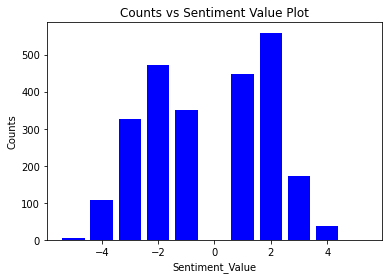

In [35]:
# Count vs Sentiment Value Plot
plt.bar(comment_sentiment_df_2['Sentiment_Value'], comment_sentiment_df_2['Counts'], color='blue')  # add the y-values and color
plt.xlabel('Sentiment_Value')  # add x-label
plt.ylabel('Counts')  # add y-label
plt.title('Counts vs Sentiment Value Plot')  # add title
plt.show()

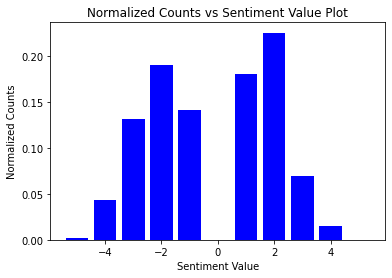

In [36]:
# Normalized Counts vs Sentiment Value Plot
plt.bar(comment_sentiment_df_2['Sentiment_Value'], comment_sentiment_df_2['Normalized_Counts'], color='blue')  # add the y-values and color
plt.xlabel('Sentiment Value')  # add x-label
plt.ylabel('Normalized Counts')  # add y-label
plt.title('Normalized Counts vs Sentiment Value Plot')  # add title
plt.show()

# Prompt
## Now we will overlay the baseline comment sentiment and the subreddit comment sentiment to help compare.

## In each of the three cells below, overlay the plots the Count, Normalized Count, and Normalized Score data vs Sentiment Value. In each plot add the appropriate x-label, y-label, plot title, and plot color

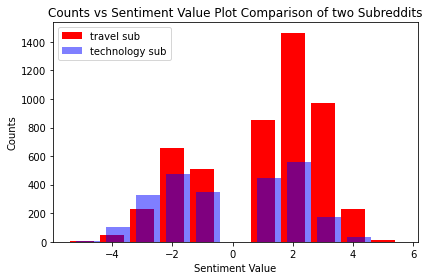

In [37]:
# Count vs Sentiment Value Plot
plt.bar(comment_sentiment_df['Sentiment_Value'], comment_sentiment_df['Counts'], color='red', label='travel sub')  # add first subreddit data and color

# add second subreddit with a slight offset of x-axis; alpha is opacity/transparency
plt.bar(comment_sentiment_df_2['Sentiment_Value'] + 0.2, comment_sentiment_df_2['Counts'], color='blue', label='technology sub', alpha=0.5)  # add second subreddit and color
plt.legend()  # show the legend

plt.xlabel('Sentiment Value')  # add x-label
plt.ylabel('Counts')  # add y-label
plt.title('Counts vs Sentiment Value Plot Comparison of two Subreddits')  # add title
plt.tight_layout()  # tight_layout() automatically adjusts margins to make it look nice
plt.show()  # show the plot

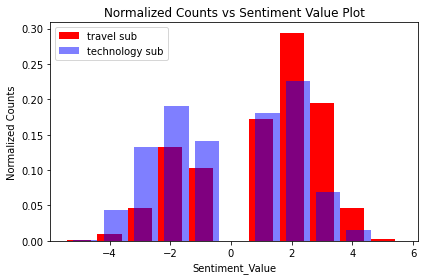

In [40]:
# Normalized Count vs Sentiment Value Plot
plt.bar(comment_sentiment_df['Sentiment_Value'], comment_sentiment_df['Normalized_Counts'], color='red', label='travel sub')  # add first subreddit data and color
ax = plt.gca()  # gets current axes of the plot for adding another dataset to the plot

# add second subreddit with a slight offset of x-axis
plt.bar(comment_sentiment_df_2['Sentiment_Value'] + 0.2, comment_sentiment_df_2['Normalized_Counts'], color='blue', label='technology sub', alpha=0.5)  # add second subreddit and color
plt.legend()  # show the legend

plt.xlabel('Sentiment_Value')  # add x-label
plt.ylabel('Normalized Counts')  # add y-label
plt.title('Normalized Counts vs Sentiment Value Plot')  # add title
plt.tight_layout()  # tight_layout() automatically adjusts margins to make it look nice
plt.show()  # show the plot

# Stretch goal (bonus-ish)
### Although this is not formally a bonus for points, it is a learning opportinity.  You are not required to complete the following part of this notebook for the assignment.

Our sentiment analysis technique above works, but has some shortcomings.  The biggest shortcoming is that each word is treated individually.  But what if we have a sentence with a negation?  For example:

'This is not a bad thing.'

This sentence should be positive overall, but AFINN only has the word 'bad' in the dictionary, and so the sentence gets an overall negative score of -3.

The most accurate sentiment analysis methods use neural networks to capture context as well as semantics.  The drawback of NNs is they are computationally expensive to train and run.

An easier method is to use a slightly-improved sentiment analysis technique, such as TextBlob or VADER (https://github.com/cjhutto/vaderSentiment) in Python.  Both libraries use a hand-coded algorithm with word scores like AFINN, but also with additions like negation rules (e.g. a word after 'not' has it's score reversed).

Other sentiment analysis libraries in Python can be read about here: https://www.iflexion.com/blog/sentiment-analysis-python

### The stretch goal
The stretch goal is to use other sentiment analysis libraries on the Reddit data we collected, and compare the various approaches (AFINN word-by-word, TextBlob, and VADER) using plots and statistics.  For the AFINN word-by-word approach, you will need to either sum up the sentiment scores for each comment, or average them.  You might also divide them by 5 to get the values between -1 and +1.

Here is a brief example of getting scores from the 3 methods described above.  We can see while the raw AFINN approach gives a score of -0.6 (if normalized), TextBlob shows 0.35 and VADER shows 0.43.

In [ ]:
!conda install -c conda-forge textblob

In [45]:
!pip install textblob vaderSentiment

In [46]:
sentence = 'This is not a bad thing.'
[(word, scores[word]) for word in sentence.split() if word in scores]

[('bad', -3)]

In [47]:
from textblob import TextBlob
tb = TextBlob(sentence)
print(tb.polarity)
print(tb.sentiment_assessments)

0.3499999999999999
Sentiment(polarity=0.3499999999999999, subjectivity=0.6666666666666666, assessments=[(['not', 'bad'], 0.3499999999999999, 0.6666666666666666, None)])


In [48]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(sentence)

{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.431}